# Develop LSTM Models for Time Series Forecasting
[ LSTM models for a range of standard time series forecasting problems.](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [2]:
df = pd.read_csv("POMO_dataset/Historical Weather Data 2010-2021_preprocessed_2.csv")
df.head()

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,...,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora,NewLabel
0,2010-01-01,1,1,2010,20,30,20,23,42,33,...,6.91,7.18,1709.0,0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,...,6.77,7.66,1707.0,1,1,1,0,0,0,24
2,2010-01-03,3,1,2010,24,27,21,24,61,50,...,6.76,7.44,1707.0,0,0,0,0,0,0,0
3,2010-01-04,4,1,2010,23,29,20,24,57,30,...,7.10,7.43,1708.0,0,0,0,0,0,0,0
4,2010-01-05,5,1,2010,22,30,21,24,48,34,...,6.53,8.05,1709.0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178 entries, 0 to 4177
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   observation                               4178 non-null   object 
 1   date                                      4178 non-null   int64  
 2   month                                     4178 non-null   int64  
 3   year                                      4178 non-null   int64  
 4   tempC_7to8                                4178 non-null   int64  
 5   tempC_1to2                                4178 non-null   int64  
 6   tempC_6to7                                4178 non-null   int64  
 7   tempC_avg(0C)                             4178 non-null   int64  
 8   Relative humidity_7to8                    4178 non-null   int64  
 9   Relative humidity_1to2                    4178 non-null   int64  
 10  Relative humidity_6to7              

In [4]:
df.columns

Index(['observation', 'date', 'month', 'year', 'tempC_7to8', 'tempC_1to2',
       'tempC_6to7', 'tempC_avg(0C)', 'Relative humidity_7to8',
       'Relative humidity_1to2', 'Relative humidity_6to7',
       'Relative humidity_avg(%)', 'windspeedKmph_7to8', 'windspeedKmph_1to2',
       'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'pressureMB_7to8',
       'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8',
       'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)',
       'weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7',
       'weatherDesc', 'Sunshine Hours', '%_soil_moisure', 'soil_pH',
       'water_pH', 'water_TDS_mgpl', 'Label (Disease Yes/No)',
       'Type of Disease (Bacterial Blight/Telya)', 'Anthracnose',
       'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora',
       'NewLabel'],
      dtype='object')

In [7]:
df1 = df[['observation', 'tempC_avg(0C)']]
df1 = df1.set_index('observation')
df1.index = pd.to_datetime(df1.index)
df1.head()

,tempC_avg(0C)
observation,
2010-01-01,23
2010-01-02,25
2010-01-03,24
2010-01-04,24
2010-01-05,24


<AxesSubplot:xlabel='observation'>

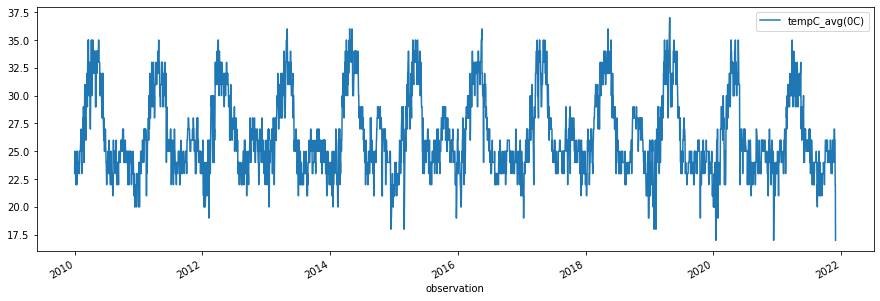

In [10]:
df1.plot(figsize=(15,5))

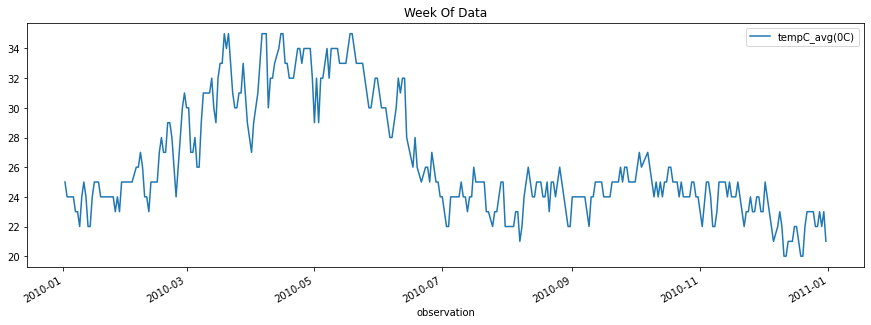

In [20]:
# How the one single week data looks like:
df1.loc[(df1.index > '01-01-2010') & (df1.index < '01-01-2011')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [ ]:
df2 = df[['observation', 'tempC_avg(0C)']]
df2 = df2.set_index('observation')
df2.index = pd.to_datetime(df2.index)
df2.head()

### Data Preparation

In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)